In [1]:
from sympy import *
from sympy.plotting import plot_parametric

In [2]:
A = Matrix([[-7, 5],
            [-6, 4]])
A

Matrix([
[-7, 5],
[-6, 4]])

In [3]:
B = Matrix([[-2],
            [3]])
B

Matrix([
[-2],
[ 3]])

In [4]:
x0 = Matrix([[3],
             [2]])
x0

Matrix([
[3],
[2]])

In [5]:
x1 = Matrix([[2],
             [2]])
x1

Matrix([
[2],
[2]])

In [6]:
t0 = 0
t1 = log(2)

In [8]:
eigs = A.eigenvects()
pprint(eigs)

⎡⎛       ⎡⎡1⎤⎤⎞  ⎛       ⎡⎡5/6⎤⎤⎞⎤
⎢⎜-2, 1, ⎢⎢ ⎥⎥⎟, ⎜-1, 1, ⎢⎢   ⎥⎥⎟⎥
⎣⎝       ⎣⎣1⎦⎦⎠  ⎝       ⎣⎣ 1 ⎦⎦⎠⎦


In [48]:
t, tau = symbols('t tau', real=True, nonnegative=True)

In [49]:
Phi = (exp(eigs[0][0] * t) * eigs[0][2][0]).col_insert(1, exp(eigs[1][0] * t) * eigs[1][2][0])
expA = Phi @ Phi.subs(t, 0).inv()

In [50]:
expA

Matrix([
[-5*exp(-t) + 6*exp(-2*t), 5*exp(-t) - 5*exp(-2*t)],
[-6*exp(-t) + 6*exp(-2*t), 6*exp(-t) - 5*exp(-2*t)]])

In [51]:
c = x1 - expA.subs(t, t1 - t0) @ x0
c

Matrix([
[5/2],
[  3]])

In [52]:
H = expA.subs(t, t1 - tau) @ B
H

Matrix([
[-27*exp(2*tau)/4 + 25*exp(tau)/2],
[  -27*exp(2*tau)/4 + 15*exp(tau)]])

In [53]:
B.col_insert(1, A @ B)

Matrix([
[-2, 29],
[ 3, 24]])

In [54]:
l1, l2 = symbols('l1 l2', real=True)
l = Matrix([[l1],
            [l2]])
l

Matrix([
[l1],
[l2]])

In [55]:
integrate(abs(H.T @ l), (tau, t0, t1))[0]

Integral(exp(tau)*Abs(27*l1*exp(tau) - 50*l1 + 27*l2*exp(tau) - 60*l2), (tau, 0, log(2)))/4

In [56]:
c

Matrix([
[5/2],
[  3]])

In [57]:
l

Matrix([
[l1],
[l2]])

In [58]:
sol = solve(l.dot(c) - 1, l2)

In [59]:
sol

[1/3 - 5*l1/6]

In [60]:
tmp = simplify((H.T @ l).subs(l2, sol[0])[0])
tmp

(-9*l1*exp(tau) - 18*exp(tau) + 40)*exp(tau)/8

In [61]:
integrate(H, (tau, t0, t1))

Matrix([
[19/8],
[39/8]])

In [62]:
taus = symbols('tau_s', real=True)
taus

tau_s

In [63]:
mu, sig = symbols('mu sigma', real=True)

In [64]:
expr_l = expA.subs(t, taus - t1) @ c + integrate(expA.subs(t, taus - tau) @ B * mu * sig, (tau, t1, taus))
expr_l

Matrix([
[23*mu*sigma/2 - 50*mu*sigma*exp(-tau_s) + 54*mu*sigma*exp(-2*tau_s) + 5*exp(-tau_s)],
[33*mu*sigma/2 - 60*mu*sigma*exp(-tau_s) + 54*mu*sigma*exp(-2*tau_s) + 6*exp(-tau_s)]])

In [65]:
expr_r = -integrate(expA.subs(t, taus - tau) @ B * mu * sig, (tau, t0, taus))
expr_r

Matrix([
[-23*mu*sigma/2 + 25*mu*sigma*exp(-tau_s) - 27*mu*sigma*exp(-2*tau_s)/2],
[-33*mu*sigma/2 + 30*mu*sigma*exp(-tau_s) - 27*mu*sigma*exp(-2*tau_s)/2]])

In [66]:
sol_1 = solve((expr_l - expr_r).subs(sig, 1), (mu, taus))
pprint(sol_1)

⎡⎛  √10   3            log(10)⎞⎤
⎢⎜- ─── - ─, -log(2) + ───────⎟⎥
⎣⎝   5    5               2   ⎠⎦


In [67]:
sol_2 = solve((expr_l - expr_r).subs(sig, -1), (mu, taus))
pprint(sol_2)

⎡⎛3   √10            log(10)⎞⎤
⎢⎜─ + ───, -log(2) + ───────⎟⎥
⎣⎝5    5                2   ⎠⎦


In [68]:
mu_opt = -sol_2[0][0]
mu_opt

-sqrt(10)/5 - 3/5

In [69]:
u_opt = mu_opt * sign(tau - sol_2[0][1])
u_opt

(-sqrt(10)/5 - 3/5)*sign(tau - log(10)/2 + log(2))

In [70]:
simplify(u_opt)

-(3 + sqrt(10))*sign(2*tau + log(2/5))/5

In [72]:
x_opt = simplify(expA.subs(t, t - t0) @ x0 + integrate(expA.subs(t, t - tau) @ B * u_opt, (tau, t0, t)))
x_opt

Matrix([
[ ((-54*(3 + sqrt(10))*exp(-2*t + 2*Min(t, -log(2) + log(10)/2)) + 100*(3 + sqrt(10))*exp(-t + Min(t, -log(2) + log(10)/2)) - 23*sqrt(10) - 69)*exp(2*t) - 50*(sqrt(10) + 4)*exp(t) + 27*sqrt(10) + 161)*exp(-2*t)/10],
[(3*(-18*(3 + sqrt(10))*exp(-2*t + 2*Min(t, -log(2) + log(10)/2)) + 40*(3 + sqrt(10))*exp(-t + Min(t, -log(2) + log(10)/2)) - 11*sqrt(10) - 33)*exp(2*t) - 60*(sqrt(10) + 4)*exp(t) + 27*sqrt(10) + 161)*exp(-2*t)/10]])

In [79]:
mu_opt

-sqrt(10)/5 - 3/5

In [80]:
ts = sol_2[0][1]
ts

-log(2) + log(10)/2

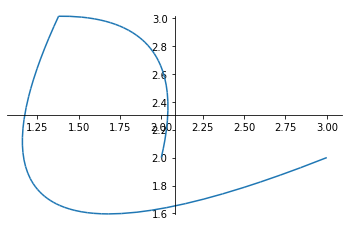

In [90]:
plot_parametric(x_opt[0], x_opt[1], (t, t0, t1))